In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family = "batang")
plt.rc('axes', unicode_minus = False)  

In [67]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler         #표준화를 도와줌

In [69]:
X = iris_df.iloc[:,:-1]
y = iris_df.iloc[:,-1]

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [70]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2

)

In [71]:
## 표준 표준화
ss  = StandardScaler()
ss.fit(train_X)

# print(ss.mean_)
# print(ss.scale_)
# print(ss.n_features_in_)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(train_scaled, train_y)
print("Train acc = {}".format(knn.score(train_scaled, train_y)))
print("Test acc = {}".format(knn.score(test_scaled, test_y)))

Train acc = 0.975
Test acc = 0.9


In [73]:
## Attribute

print('classes = ',knn.classes_)
#print('feature names = ',knn.feature_names_in_) #변수 이름
print("metric = ", knn.effective_metric_)  #평가지표
print("Samples = ",knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)

classes =  ['setosa' 'versicolor' 'virginica']
metric =  euclidean
Samples =  120
n neighbors =  5


## wine df

In [74]:
wine = pd.read_csv("http://bit.ly/wine-date")
print(wine.head())
print(wine.info())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [75]:
## class type : float -> int32
wine["class"] = wine["class"].astype("int32").astype("category")  #질문 : astype을 두번이나?
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0
1,9.8,2.6,3.20,0
2,9.8,2.3,3.26,0
3,9.8,1.9,3.16,0
4,9.4,1.9,3.51,0


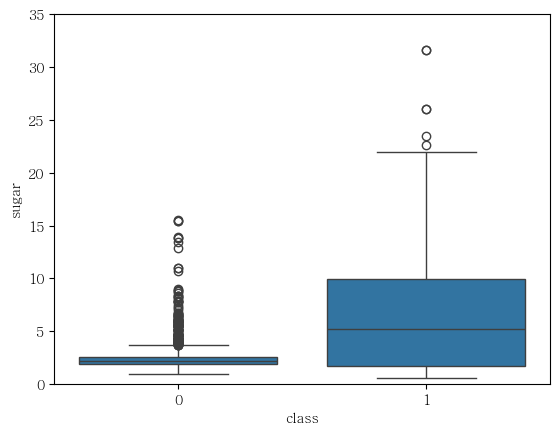

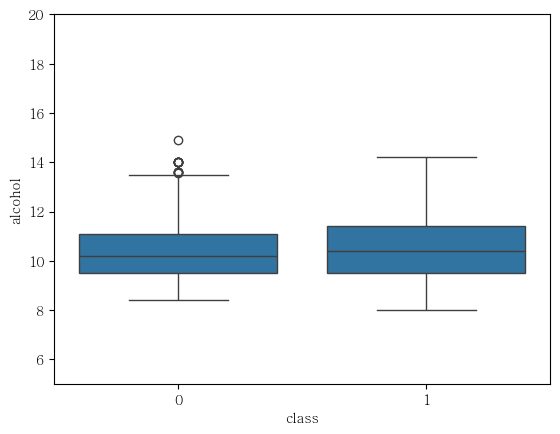

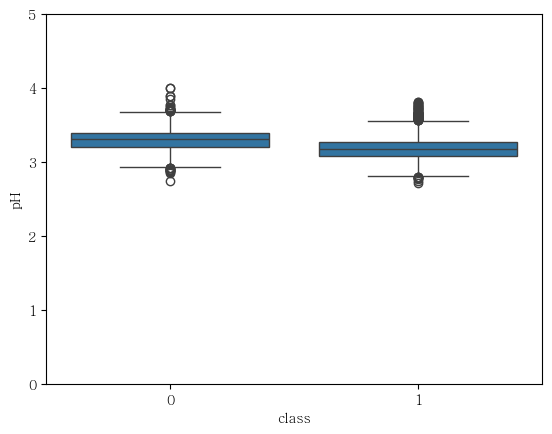

In [76]:
# fig, axs = plt.subplots(1, 2, figsize = (10,5))
# sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)

sns.boxplot(wine, x = "class", y = "sugar")
plt.ylim(0, 35)  #y축의 범위를 제한
plt.show()

sns.boxplot(wine, x = "class", y = "alcohol")
plt.ylim(5, 20)  #y축의 범위를 제한
plt.show()

sns.boxplot(wine, x = "class", y = "pH")
plt.ylim(0, 5)  #y축의 범위를 제한
plt.show()

In [77]:
#wine.head()
X = wine.iloc[:,:-1]
y = wine.iloc[:,-1]

print(X.shape)
print(y.shape)

(6497, 3)
(6497,)


In [78]:
## split

train_X, test_X, train_y, test_y = train_test_split(
    X,y, test_size = 0.3
)

print("Train Shape = ", train_X.shape)
print("Test Shape = ", test_X.shape)

Train Shape =  (4547, 3)
Test Shape =  (1950, 3)


In [79]:
## Scaling
StandScaler = StandardScaler()
StandScaler.fit(train_X)

print(StandScaler.mean_)
print(StandScaler.scale_)

train_scaled = StandScaler.transform(train_X)
test_scaled = StandScaler.transform(test_X)

[10.49048164  5.41963932  3.21682648]
[1.19099118 4.67382882 0.15828245]


## visual

In [80]:
## decision Tree
from sklearn.tree import DecisionTreeClassifier

In [81]:
dt = DecisionTreeClassifier(criterion="gini",max_depth=5, max_leaf_nodes= 10)
dt.fit(train_scaled, train_y)

print("Train ACC = ",dt.score(train_scaled, train_y))
print("Test ACC = ",dt.score(test_scaled,test_y))

Train ACC =  0.8720035188036068
Test ACC =  0.8430769230769231


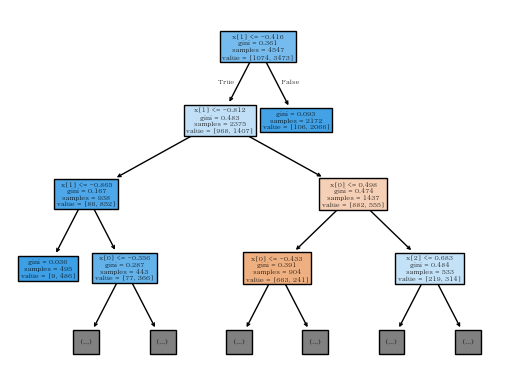

In [82]:
from sklearn.tree import plot_tree

plot_tree(dt, max_depth= 3, filled = True)
plt.show()

#### 변수의 중요도

In [83]:
print(dt.feature_importances_) #변수의 중요도 : 어떤 변수가 결정에 중요한 역할을 했는지
 
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

[0.12895054 0.77976527 0.0912842 ]


,0
alcohol,0.128951
sugar,0.779765
pH,0.091284


## 교차검증(Cross Validation, cv)

In [94]:
from sklearn.model_selection import cross_validate, StratifiedGroupKFold, GridSearchCV


In [85]:
cv_X_scaled = ss.fit_transform(X)

In [87]:
print(y.value_counts())

class
1    4898
0    1599
Name: count, dtype: int64


In [91]:
#cv_result : 우리가 궁금한 부분 : test_score.mean

splitter = StratifiedGroupKFold(n_splits = 5, shuffle = True)
cv_result = cross_validate(dt, train_scaled, train_y, cv = 5)
print("Test_score mean =",cv_result["test_score"].mean())

Test_score mean = 0.8669468924914469


기존 데이터를 나눠 실행한 것과 차이가 없으므로 cv를 사용해 한번에 mean을 구해도 무방함
-> 왜요...?ㅠ

## GridSearch

In [180]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedGroupKFold

In [181]:
#max_depth의 적정값을 찾자
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
## GridSearch
dt = DecisionTreeClassifier()

params = {
    'min_impurity_decrease':np.arange(0.001, 0.01, 0.0001),
    'max_depth': np.arange(5, 30, 1),
    'min_samples_split': np.arange(2, 100, 10)

}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
# cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)

grid_cv = GridSearchCV(dt,
                        param_grid = params,
                        cv = splitter)

grid_cv.fit(cv_X_scaled, y)
# print(grid_cv.cv_rsults_)

ValueError: Found input variables with inconsistent numbers of samples: [6497, 891]

In [116]:
grid_cv.cv_results_.keys()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [113]:
import GridSearchCV
# 최적의 파라미터 출력
print(grid_cv.best_params_)

# 교차 검증 결과의 평균 점수 출력
print(np.mean(grid_cv.cv_results_["mean_test_score"]))


AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

## Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [124]:
rf = RandomForestClassifier(n_estimators=100)

In [125]:
cv_X_scaled = ss.fit_transform(X)

print(cv_X_scaled.shape)
print(y.shape)

(6497, 3)
(6497,)


In [127]:
params = {
    'n_estimators':[50, 80, 100, 120],
    'max_depth': [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
grid_rf = GridSearchCV(rf, param_grid= params, cv = splitter)
grid_rf.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [50, 80, 100, 120]})

In [128]:
print(grid_rf.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [129]:
print(grid_rf.best_params_)
print(grid_rf.cv_results_["mean_test_score"])
print(grid_rf.best_score_)

{'max_depth': 15, 'n_estimators': 100}
[0.83130609 0.82915284 0.82745876 0.82453556 0.85962527 0.85870208
 0.85731723 0.85654764 0.86639877 0.86870658 0.87040043 0.86932315
 0.87794209 0.87578658 0.87763356 0.87824978 0.88763854 0.89148694
 0.89302552 0.89194872 0.89456505 0.89595038 0.89748884 0.89641191]
0.8974888375673595


In [130]:
rf_best = RandomForestClassifier(n_estimators=120,
                                 max_depth = 15)

rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=15, n_estimators=120)

In [132]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.22183389 0.51367197 0.26449414]
0.9919963059873788


=> hyperparameter를 구하는 법

## gb
rf와 gb의 차이 : 값을 찾고, 에러값을 찾음

In [133]:
##
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
gb = GradientBoostingClassifier()

params = {
    'n_estimators':[50, 80, 100, 120],
    'max_depth': [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle=True)
cv_score = cross_validate(gb, cv_X_scaled, y,cv = splitter)
#grid_gb.fit(cv_X_scaled, y)
#print(np.mean(cv_score["train_score"]))
print(np.mean(cv_score["test_score"]))

0.867939006336235


In [ ]:
# print(grid_gb.best_params_)
# print(grid_gb.cv_results_["mean_test_score"])
# print(grid_gb.best_score_)

## 실습

In [230]:
## DT, rf, gb survived == 1 : alive

titanic = sns.load_dataset('titanic')
titanic.head()

# X = "pclass" : "fare"

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [145]:
titanic = pd.get_dummies(titanic, columns=["sex"], drop_first=True)

In [146]:
titanic.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,sex_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,True
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,True


In [231]:
X = titanic.loc[:,"pclass":"fare"]
y = titanic["survived"]

print(X.shape)
print(y.shape)

X.info()
X.fillna(value=0, inplace=True)

(891, 6)
(891,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sex     891 non-null    object 
 2   age     714 non-null    float64
 3   sibsp   891 non-null    int64  
 4   parch   891 non-null    int64  
 5   fare    891 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 41.9+ KB


In [172]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size= 0.2
)


In [173]:
ss = StandardScaler()
ss.fit(train_X)

train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [174]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
train_scaled.fillna(0, inplace = False)

In [177]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(train_scaled, train_y)
print("Train acc = {:.4f}".format(knn.score(train_scaled, train_y)))
print("Test acc = {:.4f}".format(knn.score(test_scaled, test_y)))

Train acc = 0.7879
Test acc = 0.6704


In [178]:
print("classes = ", knn.classes_)
print("metric =", knn.effective_metric_)
print("Samples = ",knn.n_samples_fit_)
print("n neighbors = ", knn.n_neighbors)

classes =  [0 1]
metric = euclidean
Samples =  712
n neighbors =  5


In [202]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [187]:
dt = DecisionTreeClassifier(criterion= "gini")
dt.fit(train_scaled, train_y)

print("Train ACC = ",dt.score(train_scaled, train_y))
print("Test ACC = ",dt.score(test_scaled, test_y))

Train ACC =  0.9606741573033708
Test ACC =  0.6927374301675978


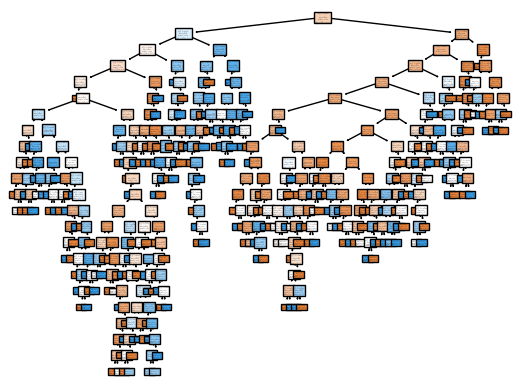

In [191]:
from sklearn.tree import plot_tree

plot_tree(dt, filled = True)
plt.show()

In [189]:
pd.DataFrame(dt.feature_importances_, index= train_X.columns)

,0
pclass,0.124720
age,0.375913
sibsp,0.067696
parch,0.045660
fare,0.386011


In [194]:
print(y.value_counts())

splitter = StratifiedGroupKFold(n_splits = 5, shuffle = True)
cv_result = cross_validate(dt, train_scaled, train_y, cv = 5)
print("Test_score mean =",cv_result["test_score"].mean())

survived
0    549
1    342
Name: count, dtype: int64
Test_score mean = 0.650201910765291


### dt

In [198]:
cv_X_scaled = ss.fit_transform(X)

dt = DecisionTreeClassifier()

params = {
    #"min_impurity_decrease":np.arange(0.001,0.01,0.0001),
    "max_depth":np.arange(3,20,1),
    #"min_samples_split":np.arange(2,100,10)
}

splitter = StratifiedKFold(n_splits=5, shuffle= True)

grid_cv = GridSearchCV(estimator = dt,
                       param_grid= params,
                       cv = splitter)

grid_cv.fit(cv_X_scaled, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [201]:
grid_cv.cv_results_.keys()

ModuleNotFoundError: No module named 'GridSearchCV'

In [203]:

print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_["mean_test_score"]))

{'max_depth': 7}
0.6884823300483335


In [204]:
rf = RandomForestClassifier(n_estimators=100)

In [205]:
cv_X_scaled = ss.fit_transform(X)

print(cv_X_scaled.shape)


(891, 5)


In [206]:
rf_best = RandomForestClassifier(n_estimators= 120,
                                 max_depth = 15)

rf_best.fit(cv_X_scaled, y)

RandomForestClassifier(max_depth=15, n_estimators=120)

In [208]:
print(rf_best.feature_importances_)
print(rf_best.score(cv_X_scaled, y))

[0.10164349 0.35380611 0.06619687 0.05560135 0.42275218]
0.9562289562289562


In [209]:
gb = GradientBoostingClassifier()

params = {
    "n_estimators":[50, 80, 100, 120],
    "max_depth":[3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits=5, shuffle= True)
cv_score = cross_validate(gb, cv_X_scaled, y, cv=splitter)

print(np.mean(cv_score["test_score"]))

0.7115058690603226
